Solving system of 1st Order ODE using RK2(Modified Euler)

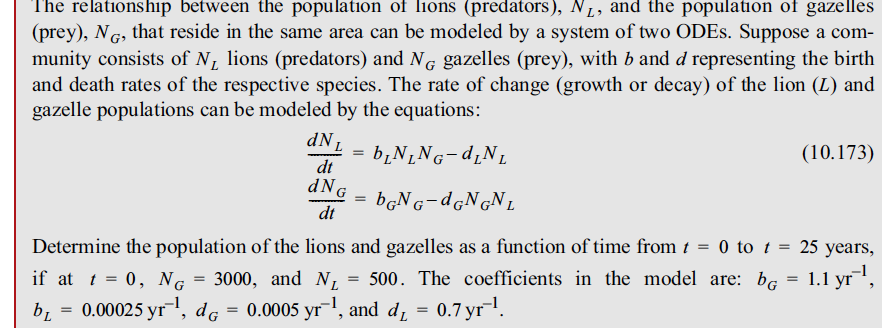

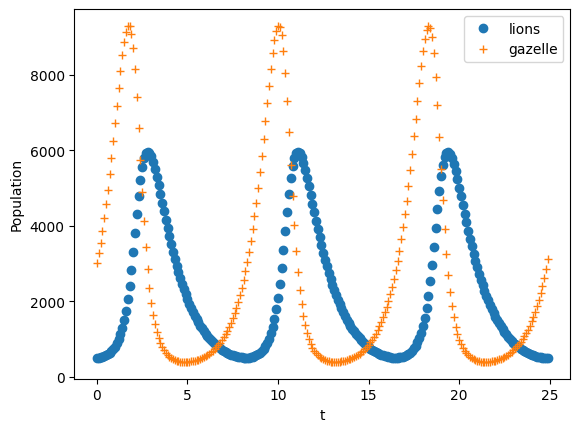

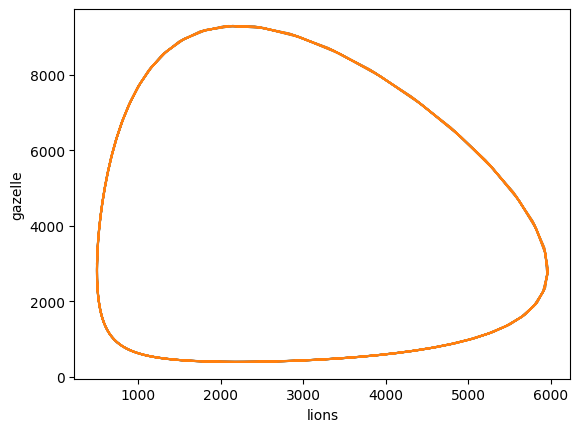

In [ ]:
import numpy as np
def lion(t,nl,ng,bl,dl):  # define the ODE function
    return bl*nl*ng-dl*nl
def gaz(t,nl,ng,bg,dg):  # define the ODE function
    return bg*ng-dg*ng*nl


def euler_method(t0, nl0, ng0, tN,bl,dl,bg,dg, h):
    t = np.arange(t0, tN, h)  # time points
    nl = np.zeros((len(t),))  # initialize solution array
    ng = np.zeros((len(t),))
    Kl1  = np.zeros((len(t),)) # initialize solution array
    Kg1  = np.zeros((len(t),))
    Kl2  = np.zeros((len(t),)) # initialize solution array
    Kg2  = np.zeros((len(t),))
    nl[0] = 500  # set initial condition
    ng[0] = 3000  # set initial condition

    for i in range(1, len(t)):
        Kl1[i-1] = lion(t[i-1],nl[i-1],ng[i-1],bl,dl)
        Kg1[i-1] = gaz(t[i-1],nl[i-1],ng[i-1],bg,dg)
        Kl2[i] = lion(t[i], nl[i-1]+Kl1[i-1]*h,ng[i-1]+Kg1[i-1]*h,bl,dl)
        Kg2[i] = gaz(t[i], nl[i-1]+Kl1[i-1]*h,ng[i-1]+Kg1[i-1]*h,bg,dg)

        nl[i] = nl[i-1] + (h/2) * (Kl1[i-1]+Kl2[i])
        ng[i] = ng[i-1] + (h/2) * (Kg1[i-1]+Kg2[i])

    return t, nl,ng

# Example usage:
t0 = 0  # initial time
nl0 = 500  # initial condition
ng0 = 3000  # initial condition
tN = 25  # final time
h = 0.1  # step size
bg=1.1
bl=0.00025
dg=0.0005
dl=0.7


t, nl, ng = euler_method(t0, nl0, ng0,tN,bl,dl,bg,dg, h)


import matplotlib.pyplot as plt
plt.plot(t, nl,'o',t,ng,'+')
plt.legend(['lions', 'gazelle'])
plt.xlabel('t')
plt.ylabel('Population')

plt.show()
plt.plot( nl,ng)

plt.xlabel('lions')
plt.ylabel('gazelle')
plt.plot(nl,ng)

MONTECARLO



In [ ]:
#To generate random numbers uniformly distributed between 0 and 1 in Python,
#you can use the numpy.random.uniform() function from the NumPy library
import numpy as np

random_numbers = np.random.uniform(0, 1, size=10)
print(random_numbers)
#If you want to generate a single random number, you can omit the size parameter:
random_number = np.random.uniform(0, 1)
print(random_number)

[0.48478427 0.13683948 0.97389686 0.60569245 0.83563963 0.88864421
 0.34384269 0.29771033 0.99392394 0.86841491]
0.5857807781684822


MonteCarlo integration

1. Determining the value of $\pi$

In [ ]:
#code to calculate pi via Monte Carlo integration
import numpy as np
N = input('Enter number of points: ');
N = int(N)
numberin = 0; # Count number inside circle.
for i in range(1,N): # Loop over points.
  x = np.random.uniform(-1,1) ; # Random point in the square.
  y = np.random.uniform(-1,1) ;
  if x**2 + y**2 < 1.0: # See if point is inside the circle.
    numberin = numberin + 1; # If so, increment counter.
pio4 = numberin/N; # Approximation to pi/4.
piapprox = 4.0*pio4 # Approximation to pi
print("Approximation of pi:", piapprox)
varpio4 = (pio4 - pio4**2)/N;
#Variance in approximation to pi/4.
varpi = 16*varpio4; # Variance in approximation to pi.
# Note factor of 16.
stdpi = np.sqrt(varpi); # Standard deviation in approximation to pi.
print("Standard deviation in approximation to pi:", stdpi)

Enter number of points: 10000000
Approximation of pi: 3.140718
Standard deviation in approximation to pi: 0.0005194961447860802


3D Integration

density of object $\gamma= \exp(0.5z)$.

$\int \int \int _{volume} \gamma(x,y,z) dx dy dz$

In [ ]:
import numpy as np
N = input(' Enter number of sample points: ');
N = int(N)
def gamma(x,y,z):
  return np.exp(0.5*z)
volumeOfBox = 10*10*10; # Volume of surrounding box.
vol = 0;
mass = 0; # Initialize volume and mass of object.
volsq = 0;
masssq = 0; # Initialize their squares.
for i in range (1,N): # Loop over sample points.
  x = np.random.uniform(-5,5) ; # Generate a point from surrounding box.
  y = np.random.uniform(-5,5) ;
  z = np.random.uniform(-5,5) ;
  if x*y*z <= 1: # Check if point is inside object.
    vol = vol + 1; # If so, add to vol and mass.
    mass = mass + gamma(x,y,z);
    volsq = volsq + 1; #Also add to square of vol and mass.
    masssq = masssq + gamma(x,y,z)**2;
volumeOfObject = (vol/N)*volumeOfBox # Fraction of pts inside times vol of box
volvar = (1/N)*((volsq/N) - (vol/N)**2)*volumeOfBox**2; # Variance in vol of object:
# (Expected value of volsq - square of expected value of vol) divided by N and
# multiplied by square of factor volumeOfBox.
volstd = np.sqrt(volvar) # Standard deviation in volume of object.
massOfObject = (mass/N)*volumeOfBox # Average mass times volume of box
massvar = (1/N)*((masssq/N) - (mass/N)**2)*volumeOfBox**2; # Variance in mass:
# (Expected value of masssq - square of expected value of mass) divided by N and
# multiplied by square of factor volumeOfBox.
massstd = np.sqrt(massvar) # Standard deviation in mass of object.
print("Volume of object:", volumeOfObject)
print("Standard deviation in volume of object:", volstd)
print("Mass of object:", massOfObject)
print("Standard deviation in mass of object:", massstd)

 Enter number of sample points: 1000000
Volume of object: 570.288
Standard deviation in volume of object: 0.4950349452877039
Mass of object: 1324.5663836948522
Standard deviation in mass of object: 2.4786458187646256


3D Integration

$\int_{0}^{1} (\int_{x}^{1} (\int_{xy}^{2} \cos(xy e^{z})dz)dy)dx$

In [ ]:
import numpy as np
def f(x,y,z):
  return np.cos(x*y*np.exp(z)) # Define integrand.
N = input(' Enter number of sample points:' );
N=int(N)
In = 0; # Initialize integral.
In2=0;
for i in range(1,N): # Loop over sample points.
# Generate a point from surrounding box.
  x = np.random.uniform(0,1);
  y = np.random.uniform(0,1);
  z = np.random.uniform(0,2);
  if x <= y and x*y <= z: # Check if point is inside region.
    In = In + f(x,y,z); # If so, add to int.
    In2=In2+f(x,y,z)*f(x,y,z)
In = (In/N)*2
var=(1/N)*((In2/N)*4-In**2)
std=np.sqrt(var)
print("Integral:", In)
print("Standard deviation:", std)

 Enter number of sample points:1000000
Integral: 0.5229203372146503
Standard deviation: 0.0009620192907829723


1d Montecarlo search



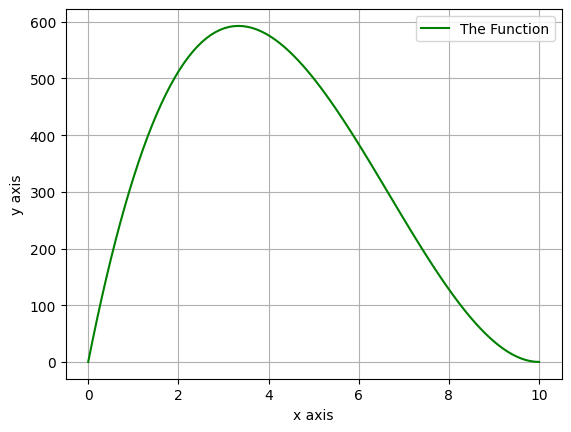

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,10, 100)
y = (20-2*x)*(20-2*x)*x
plt.plot(x,y, 'green', label='The Function')
plt.grid()
plt.legend()
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

In [ ]:
import numpy as np

def monte_carlo_max(f, a, b, N):
    # Generate uniform random samples
    x = np.random.uniform(a, b, N)

    # Evaluate function values
    y = [f(xi) for xi in x]

    # Find the maximum
    x_max = x[np.argmax(y)]

    return x_max

def f(x):
    return (20-2*x)*(20-2*x)*x

x_max = monte_carlo_max(f, 0, 10, 10000)
print(x_max)  # Output

3.333276760570054
